# Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
**The company wants to increase sales by selling more everyday products repeatedly.**
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

In [4]:
# Import the necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# import and read file
df = pd.read_csv(r"pet_supplies_2212.csv")
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## Data Description


| Column | Type | Description | Missing Value Handling |
| --- | --- | --- | --- |
| `product_id` | Nominal | The unique identifier of the product. | Missing values are not possible due to the database structure. |
| `category` | Nominal | The category of the product, one of 6 values (Housing, Food, Toys, Equipment, Medicine, Accessory). | Missing values should be replaced with "Unknown". |
| `animal` | Nominal | The type of animal the product is for. One of Dog, Cat, Fish, Bird. | Missing values should be replaced with "Unknown". |
| `size` | Ordinal | The size of animal the product is for. Small, Medium, Large. | Missing values should be replaced with "Unknown". |
| `price` | Continuous | The price the product is sold at. Can be any positive value, round to 2 decimal places. | Missing values should be replaced with the overall median price. |
| `sales` | Continuous | The value of all sales of the product in the last year. This can be any positive value, rounded to 2 decimal places. | Missing values should be replaced with the overall median sales. |
| `rating` | Discrete | Customer rating of the product from 1 to 10. | Missing values should be replaced with 0. |
| `repeat_purchase` | Nominal | Whether customers repeatedly buy the product (1) or not (0). | Missing values should be removed. |ues should be removed

## Data Investigation

In [8]:
# check for the shape
df.shape

(1500, 8)

In [9]:
# the info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [10]:
# the missing value
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [11]:
# check for duplicates
df.duplicated().sum()

0

In [12]:
# summary stastical analysis
df.describe().round(2)

,product_id,sales,rating,repeat_purchase
count,1500.00,1500.00,1350.00,1500.00
mean,750.50,996.60,4.99,0.60
std,433.16,323.95,1.56,0.49
min,1.00,286.94,1.00,0.00
25%,375.75,747.42,4.00,0.00
50%,750.50,1000.83,5.00,1.00
75%,1125.25,1158.16,6.00,1.00
max,1500.00,2255.96,9.00,1.00


## Data Preprocessing
- Data Validation
- Data Cleaning and Transformation

In [14]:
df.rename(columns = {'category': 'Category', 'animal': 'Animal', 'size': 'Size', 'price': 'Price', 'sales':'Sales', 'rating':'Rating', 
                     'repeat_purchase': 'Repeat Purchase'}, inplace = True)
df.head()

,product_id,Category,Animal,Size,Price,Sales,Rating,Repeat Purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [15]:
# extract the categorical data
cat_vars = df.select_dtypes(include = ['object', 'category'])
cat_vars

,Category,Animal,Size,Price
0,Food,Bird,large,51.1
1,Housing,Bird,MEDIUM,35.98
2,Food,Dog,medium,31.23
3,Medicine,Cat,small,24.95
4,Housing,Cat,Small,26.18
...,...,...,...,...
1495,Food,Bird,medium,40.91
1496,Equipment,Dog,small,32.89
1497,Food,Fish,Small,25.79
1498,Medicine,Fish,small,19.94


In [16]:
# extract the numerical data
num_vars = df.select_dtypes(include = ['number'])
num_vars

,product_id,Sales,Rating,Repeat Purchase
0,1,1860.62,7.0,1
1,2,963.60,6.0,0
2,3,898.30,5.0,1
3,4,982.15,6.0,1
4,5,832.63,7.0,1
...,...,...,...,...
1495,1496,1203.36,5.0,0
1496,1497,1099.97,5.0,0
1497,1498,724.02,3.0,0
1498,1499,658.66,5.0,1


In [17]:
# run a loop over the cat_vars
for columns in cat_vars:
    print(cat_vars[columns].value_counts())

Category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: count, dtype: int64
Animal
Cat     567
Fish    369
Dog     367
Bird    197
Name: count, dtype: int64
Size
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: count, dtype: int64
Price
unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: count, Length: 707, dtype: int64


In [18]:
# run a loop over the num_vars
for columns in num_vars:
    print(num_vars[columns].value_counts())

product_id
1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: count, Length: 1500, dtype: int64
Sales
1034.36    3
742.87     2
1342.90    2
1031.11    2
1348.27    2
          ..
1072.20    1
727.87     1
1460.29    1
1196.56    1
826.08     1
Name: count, Length: 1476, dtype: int64
Rating
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: count, dtype: int64
Repeat Purchase
1    906
0    594
Name: count, dtype: int64


In [19]:
# Handle the inconsistency in data and missing values
cat_vars['Category'] = cat_vars['Category'].str.replace("-", "Unknown")
cat_vars["Category"].value_counts()

Category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: count, dtype: int64

In [20]:
# size
cat_vars['Size'] = cat_vars['Size'].str.replace("SMALL", "Small")
cat_vars['Size'] = cat_vars['Size'].str.replace("small", "Small")
cat_vars['Size'] = cat_vars['Size'].str.replace("LARGE", "Large")
cat_vars['Size'] = cat_vars['Size'].str.replace("large", "Large")
cat_vars['Size'] = cat_vars['Size'].str.replace("MEDIUM", "Medium")
cat_vars['Size'] = cat_vars['Size'].str.replace("medium", "Medium")
cat_vars['Size'].value_counts() 

Size
Small     754
Medium    492
Large     254
Name: count, dtype: int64

In [21]:
# price
cat_vars['Price'] = cat_vars['Price'].str.replace("unlisted", "nan").astype("float64")
cat_vars['Price'].value_counts()

Price
22.98    13
28.00    10
27.97     8
27.99     8
28.03     8
         ..
20.79     1
54.02     1
31.27     1
34.11     1
25.79     1
Name: count, Length: 706, dtype: int64

In [22]:
cat_vars['Price'].isnull().sum()

150

In [23]:
# replace the NaN with overall median price
median_price = cat_vars['Price'].median()
median_price

28.064999999999998

In [24]:
cat_vars['Price'].fillna(median_price, inplace = True)

In [25]:
cat_vars['Price'].isnull().sum()

0

In [26]:
# Rating
num_vars["Rating"].fillna(0, inplace = True)

In [27]:
num_vars["Rating"].isnull().sum()

0

In [28]:
# Repeat Purchase
def repeat_purchase(x):
    if x == 0:
        return "No"
    else:
        return "Yes"

num_vars["Repeat Purchase"] = num_vars["Repeat Purchase"].apply(repeat_purchase)
num_vars["Repeat Purchase"].head()

0    Yes
1     No
2    Yes
3    Yes
4    Yes
Name: Repeat Purchase, dtype: object

In [29]:
num_vars.head()

,product_id,Sales,Rating,Repeat Purchase
0,1,1860.62,7.0,Yes
1,2,963.60,6.0,No
2,3,898.30,5.0,Yes
3,4,982.15,6.0,Yes
4,5,832.63,7.0,Yes


In [30]:
# Concatenate cat_vars and num_vars
df_cleaned = pd.concat([cat_vars, num_vars], axis = 1)
df_cleaned.head()

,Category,Animal,Size,Price,product_id,Sales,Rating,Repeat Purchase
0,Food,Bird,Large,51.10,1,1860.62,7.0,Yes
1,Housing,Bird,Medium,35.98,2,963.60,6.0,No
2,Food,Dog,Medium,31.23,3,898.30,5.0,Yes
3,Medicine,Cat,Small,24.95,4,982.15,6.0,Yes
4,Housing,Cat,Small,26.18,5,832.63,7.0,Yes


## Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [32]:
df_cleaned.isnull().sum()

Category           0
Animal             0
Size               0
Price              0
product_id         0
Sales              0
Rating             0
Repeat Purchase    0
dtype: int64

## Univariate Analysis

In [34]:
# Distribution of category
dist_cat = df_cleaned["Category"].value_counts()
dist_cat

Category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: count, dtype: int64

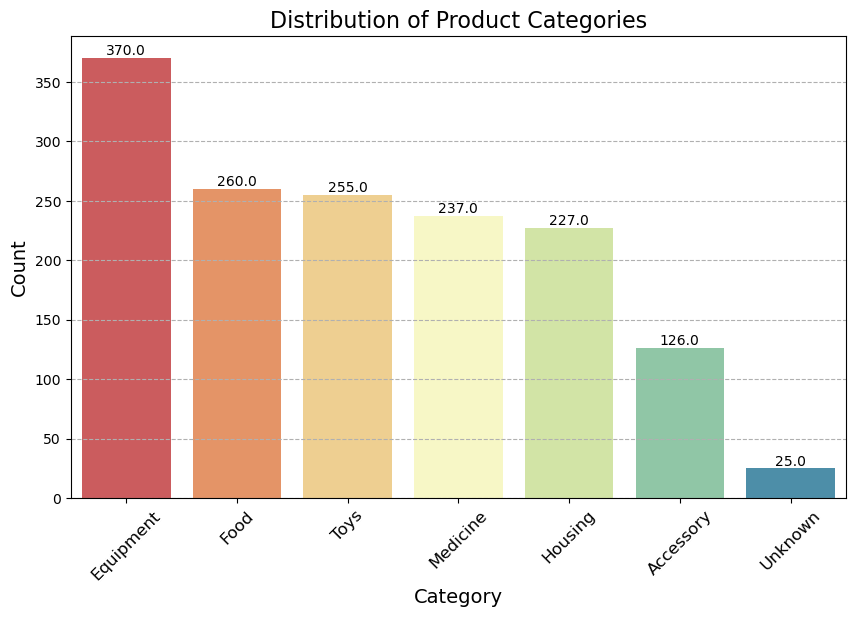

In [35]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dist_cat.index, y=dist_cat.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Distribution of Product Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()


In the Product category, Equipment has the highest distribution count with a total count of 370 followed by Food with a total count of 260 while the least count is Unknown with a total count of 25.

In [37]:
# Distribution of Animals
dist_animal = df_cleaned["Animal"].value_counts()
dist_animal

Animal
Cat     567
Fish    369
Dog     367
Bird    197
Name: count, dtype: int64

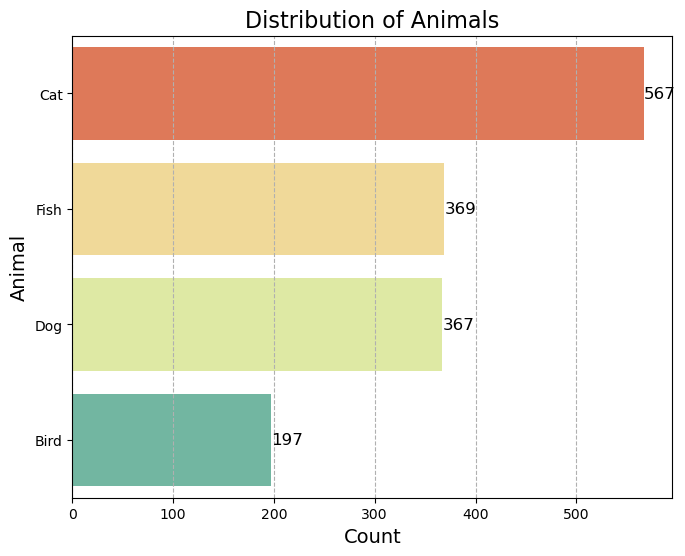

In [38]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=dist_animal.index, x=dist_animal.values, palette="Spectral")

# Add data labels
for i, v in enumerate(dist_animal.values):
    ax.text(v, i, str(v), color="black", va="center", fontsize=12)

# Add labels and title
plt.title("Distribution of Animals", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Animal", fontsize=14)

# Adjust the spacing between bars
plt.subplots_adjust(left=0.3)

# Add grid lines
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()


Among the Animals, the Cat has the highest purchase with a total count of 567 followed by Fish with a total count of 369 while the least is the Bird with a total count of 197.

In [40]:
# Size distribution
dist_size = df_cleaned["Size"].value_counts()
dist_size

Size
Small     754
Medium    492
Large     254
Name: count, dtype: int64

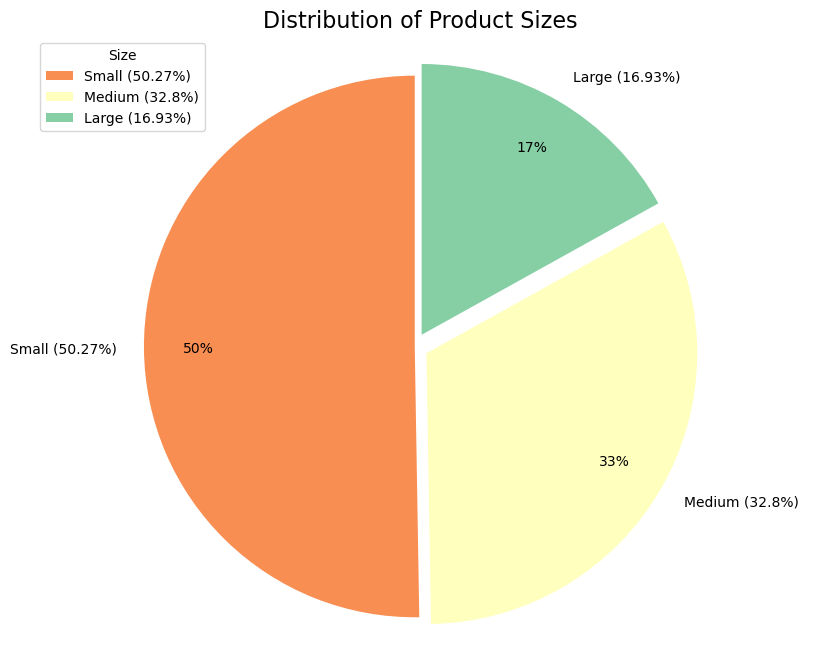

In [41]:
# Create the pie chart
plt.figure(figsize=(10, 8))
total = dist_size.sum()
sizes = [f"{size} ({round(count/total*100, 2)}%)" for size, count in zip(dist_size.index, dist_size.values)]
explode = [0.05 if size != dist_size.idxmax() else 0 for size in dist_size.index]
colors = sns.color_palette("Spectral", n_colors=len(dist_size))
plt.pie(dist_size.values, labels=sizes, explode=explode, colors=colors, autopct=lambda p: '{:.0f}%'.format(p), startangle=90, pctdistance=0.8)

# Add labels and title
plt.title("Distribution of Product Sizes", fontsize=16)
plt.axis("equal")  # Equal aspect ratio ensures that pie is circular.
plt.legend(title="Size", loc="upper left", fontsize=10)

# Show the plot
plt.show()


Among the size of the pet category, the highest contribution to PetMind Sales is Small size with a 50.27% proportion followed by Medium with a 32.8% proportion while the least is Large with a 16.93% proportion.

In [43]:
# Distribution of price
dist_price = df_cleaned["Price"].describe().round(2)
dist_price

count    1500.00
mean       29.29
std         7.34
min        12.85
25%        25.00
50%        28.06
75%        33.14
max        54.16
Name: Price, dtype: float64

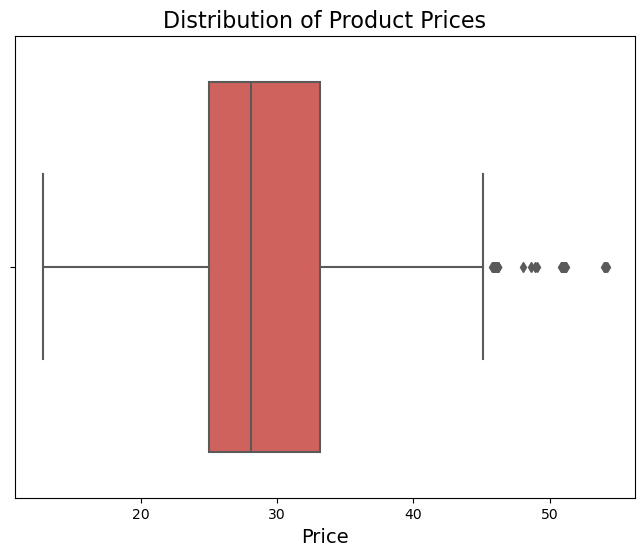

In [44]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned["Price"], palette=sns.color_palette("Spectral", 6))

# Add labels and title
plt.title("Distribution of Product Prices", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("", fontsize=14)

# Show the plot
plt.show()


In the price distribution, 75% of the total count of customer spend is `$33.14` followed a 50% with a total spend of `$28.6` while the remaining 25% have a total spend of `$25` with an average spending size of `$29.29` and the maximum and minimum spending is `$54.16` and `$12.85`, respectively.

In [46]:
# Distribution of Sales
dist_sales = df_cleaned["Sales"].describe().round(2)
dist_sales

count    1500.00
mean      996.60
std       323.95
min       286.94
25%       747.42
50%      1000.83
75%      1158.16
max      2255.96
Name: Sales, dtype: float64

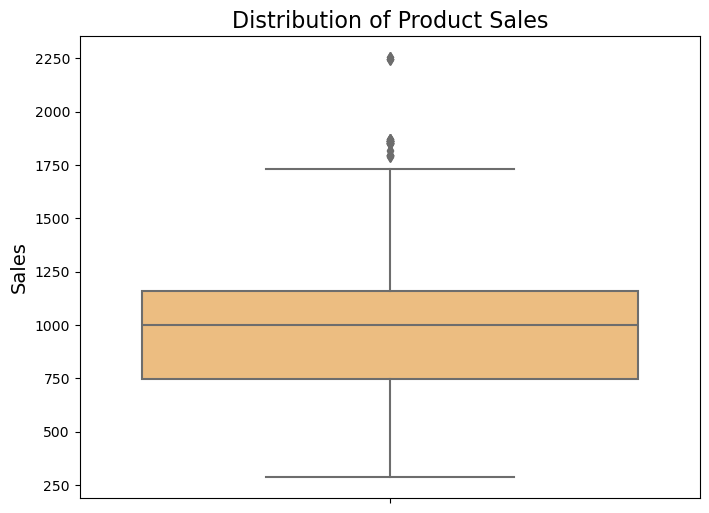

In [47]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned["Sales"], palette=sns.color_palette("Spectral", 2))

# Add labels and title
plt.title("Distribution of Product Sales", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Sales", fontsize=14)

# Show the plot
plt.show()

In the Sales distribution, 75% of the total count of company sales generation has a size of `$1158.16` followed a 50% with a total sales generation of `$1000.83` while the remaining 25% has a total sales generation size worth `$747.42` with an average sales size worth `$996.60` and the maximum and minimum sales size is `$2255.96` and `$286.94`, respectively.

In [49]:
# Rating distribution
dist_rating = df_cleaned["Rating"].value_counts()
dist_rating

Rating
5.0    304
6.0    299
4.0    283
3.0    190
0.0    150
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: count, dtype: int64

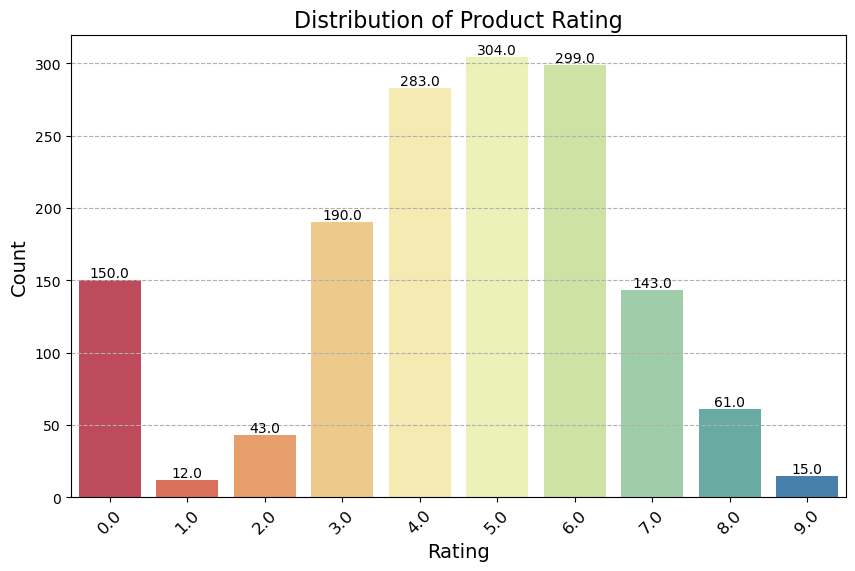

In [50]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dist_rating.index, y=dist_rating.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Distribution of Product Rating", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()


It is seen that the most common product rating given by customers is 5, with a total count of 304. This is followed by a rating of 6, which has a count of 299. The lowest product rating received is 1, with a count of 12.

In other words, the majority of customers rated the products very highly, with the most frequent ratings being 5 and 6. However, there were also a small number of customers who gave the lowest possible rating of 1.

In [52]:
# Repeat Purchases Distribution
dist_repeat = df_cleaned["Repeat Purchase"].value_counts()
dist_repeat

Repeat Purchase
Yes    906
No     594
Name: count, dtype: int64

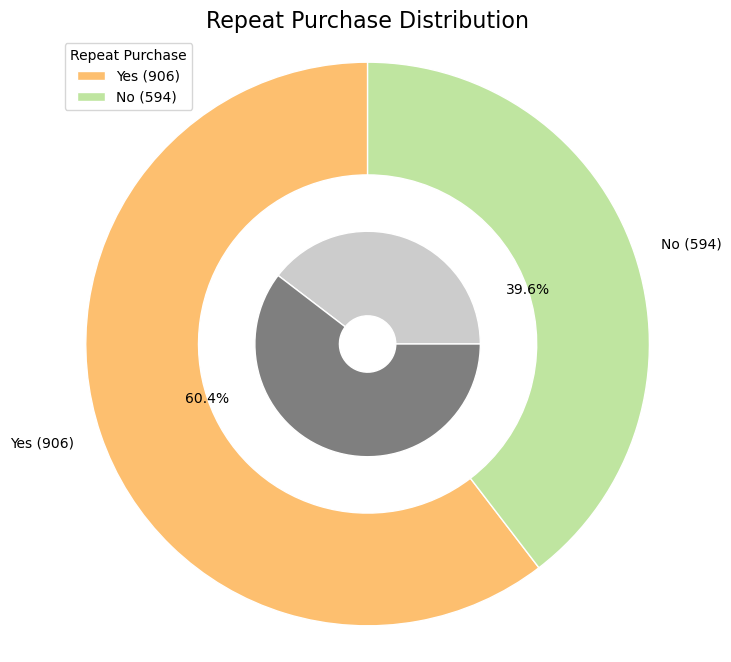

In [53]:
# Create the donut chart
plt.figure(figsize=(8, 8))
sizes = dist_repeat.values
labels = [f"{label} ({count})" for label, count in zip(dist_repeat.index, sizes)]
colors = sns.color_palette("Spectral", n_colors=len(dist_repeat))

# Create the donut
outer_circle = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)[0]
plt.setp(outer_circle, width=0.4, edgecolor='white')

inner_circle = plt.pie([dist_repeat["No"], dist_repeat["Yes"]], colors=["#CCCCCC", "#7F7F7F"], radius=0.4)[0]
plt.setp(inner_circle, width=0.3, edgecolor='white')

plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.title("Repeat Purchase Distribution", fontsize=16)
plt.legend(title="Repeat Purchase", loc="upper left", fontsize=10)

plt.show()


Most of the Customers tend to repeat purchases with a 60.4% contribution of the total count of repeat purchases while 39.6% tend to not repeat purchases.

## Bivariate Analysis
- comparing the variables with the target, which is `Repeat Purchase`, and their visualizations.

In [56]:
df_cleaned.columns

Index(['Category', 'Animal', 'Size', 'Price', 'product_id', 'Sales', 'Rating',
       'Repeat Purchase'],
      dtype='object')

## Product Category Analysis
- category vs repeat purchase
- category vs average price
- category vs rating
- category vs size

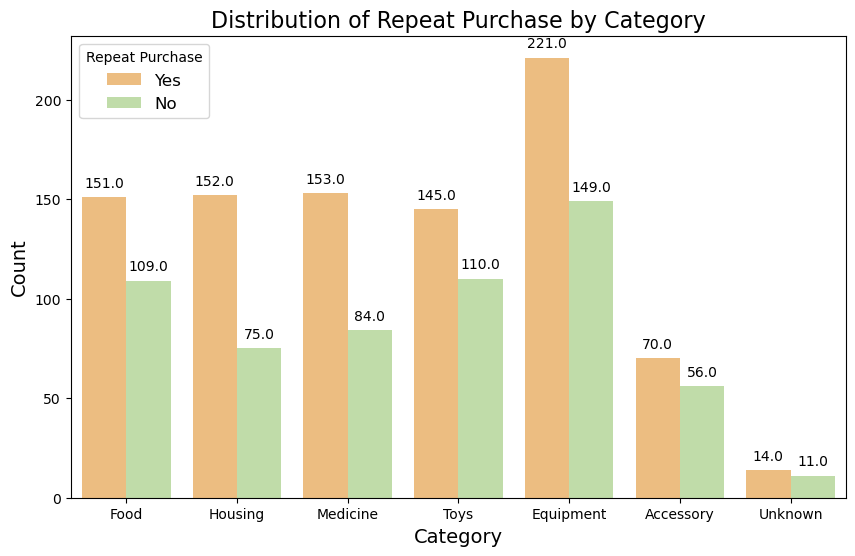

In [58]:
# Category vs repeat purchase distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Category", hue="Repeat Purchase", data=df_cleaned, palette=sns.color_palette("Spectral", 2), ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Customize the plot
ax.set_title("Distribution of Repeat Purchase by Category", fontsize=16)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Repeat Purchase", loc="upper left", fontsize=12)

plt.show()

Notably, Equipment has the highest count of repeat purchases with a count of 221 followed by Medicine, Housing, and Food with a count of 153, 152, and 151, respectively. The least product category with the lowest repeat purchases is Unknown with a count of 14. It suggests that most customers tend to repeat purchases of Equipment, Medicine, Housing, and Food.

In [60]:
# Product Category by Average Price
cat_avg_price = df_cleaned.groupby("Category")["Price"].mean().sort_values(ascending = False).round(2)
cat_avg_price

Category
Food         33.69
Toys         33.26
Unknown      32.24
Accessory    31.35
Equipment    26.96
Housing      26.52
Medicine     25.07
Name: Price, dtype: float64

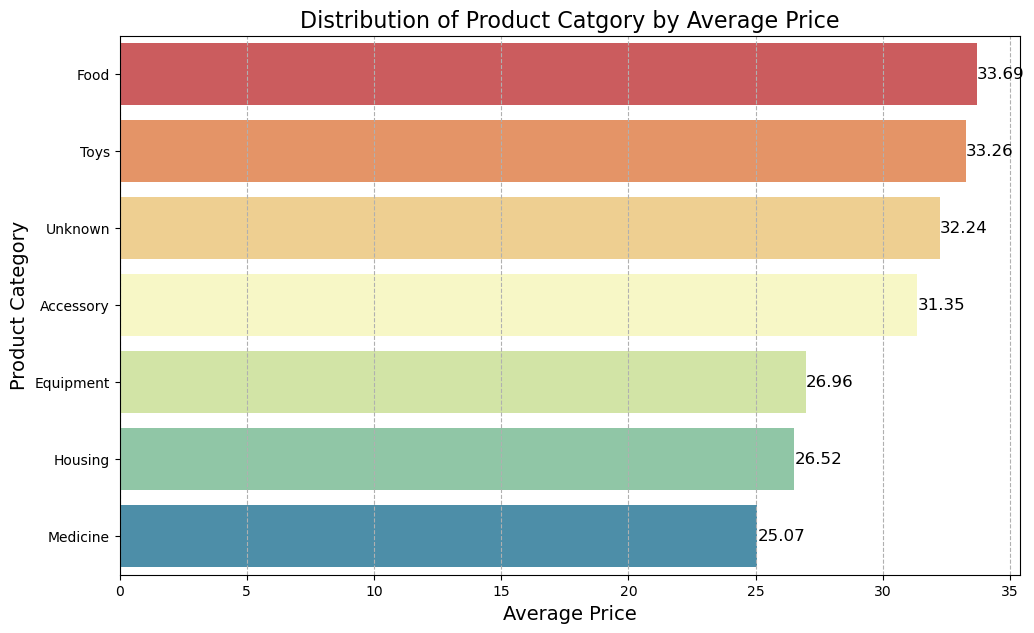

In [61]:
# Create the horizontal bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(y=cat_avg_price.index, x=cat_avg_price.values, palette="Spectral")

# Add data labels
for i, v in enumerate(cat_avg_price.values):
    ax.text(v, i, str(v), color="black", va="center", fontsize=12)

# Add labels and title
plt.title("Distribution of Product Catgory by Average Price", fontsize=16)
plt.xlabel("Average Price", fontsize=14)
plt.ylabel("Product Category", fontsize=14)

# Adjust the spacing between bars
plt.subplots_adjust(left=0.3)

# Add grid lines
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()


The Product category with the lowest average price is Medicine at `$25.07` followed by Housing and Equipment at `$26.52` and `$26.96`, respectively. The highest is Food with an average price of `$33.69. This suggests that lower pricing will cause customers to repeat purchases of product categories.

In [63]:
#  Product Category by Average Rating
cat_rating = df_cleaned.groupby("Category")["Rating"].mean().round()
cat_rating

Category
Accessory    4.0
Equipment    5.0
Food         4.0
Housing      4.0
Medicine     5.0
Toys         5.0
Unknown      4.0
Name: Rating, dtype: float64

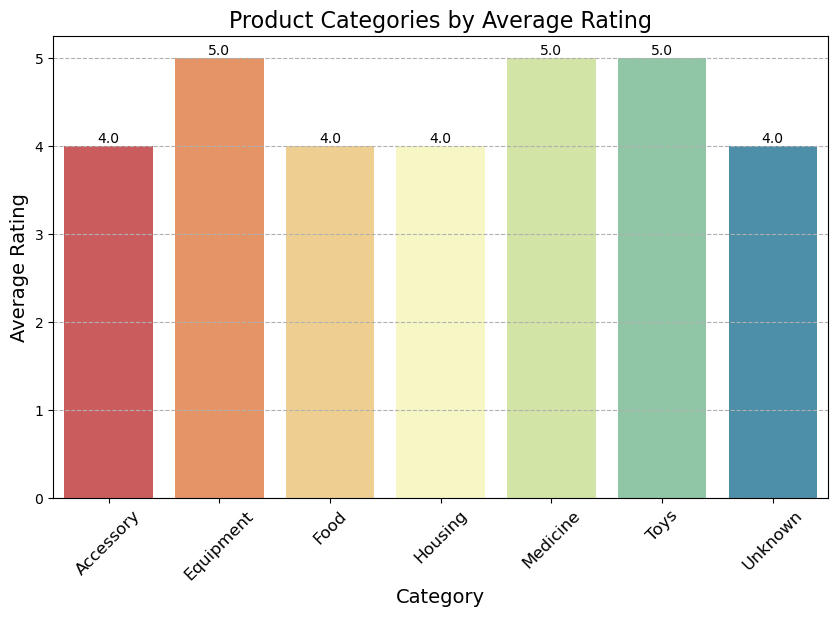

In [64]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cat_rating.index, y=cat_rating.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Product Categories by Average Rating", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()


The chart a indicates that the products with the highest average rating are Equipment, Medicine, and Toys, all of which have an average rating of 5.0. This suggests that customers are generally very satisfied with these product categories. The high ratings for Equipment and Medicine, in particular, imply that customers are highly pleased with the quality and performance of these products. This could be a sign that the company is doing an excellent job in manufacturing and delivering these types of products, as the majority of customers appear to be rating them very favorably.

In summary, the exceptionally high average ratings for Equipment, Medicine, and Toys suggest that these are the product categories that customers are most satisfied with, potentially indicating the company's strengths in these areas.

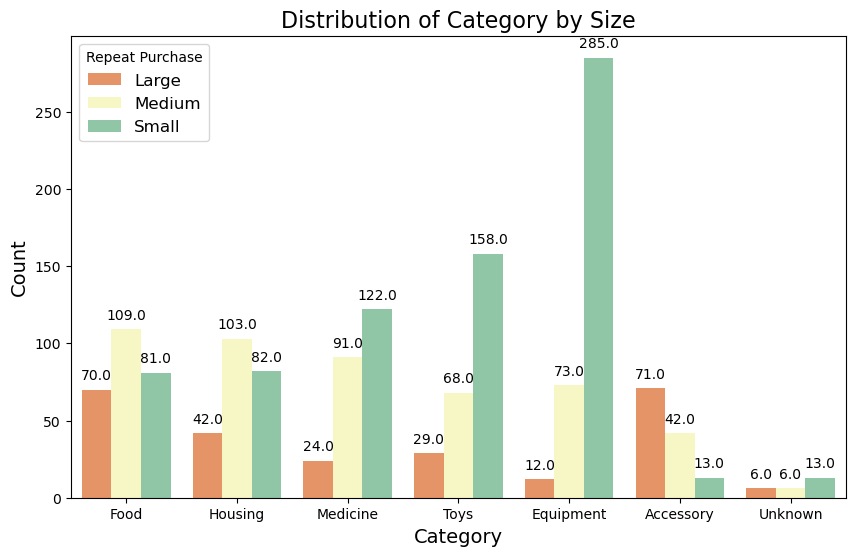

In [66]:
# Product category by size

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Category", hue="Size", data=df_cleaned, palette=sns.color_palette("Spectral", 3), ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Customize the plot
ax.set_title("Distribution of Category by Size", fontsize=16)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Repeat Purchase", loc="upper left", fontsize=12)

plt.show()


Thchartis reveals that the most common product size purchased by customers is Small. Within the Small size category, Equipment has the highest count at 285, followed by Toys at 158 and Medicine at 122. This suggests that customers tend to favor smaller-sized Equipment, Toys, and Medicine products.

When it comes to Medium-sized products, Food has the highest count at 109, followed by Housing at 103. The least popular Medium-sized product is Unknown, with a count of only 6.

Interestingly, the data does not indicate any significant purchases of Large-sized products across the different product categories. This implies that customers generally do not tend to buy the larger versions of the available products.

In summary, the analysis shows a clear preference among customers for Small-sized products, particularly in the Equipment, Toys, and Medicine categories. The Medium-sized products, while also purchased, are less popular than the Small-sized options.

## Pet Animal Demography Analysis
- Animal vs Sales
- Animal vs Quantity
- Animal vs Repeat Purchase
- Animal vs Average Price
- Animal vs Rating

In [69]:
# Which Pet Animal do customers purchase the most?

pet_sales = df_cleaned.groupby('Animal')['Sales'].sum().sort_values(ascending = False)
pet_sales

Animal
Cat     574232.13
Dog     388405.75
Bird    274999.99
Fish    257258.90
Name: Sales, dtype: float64

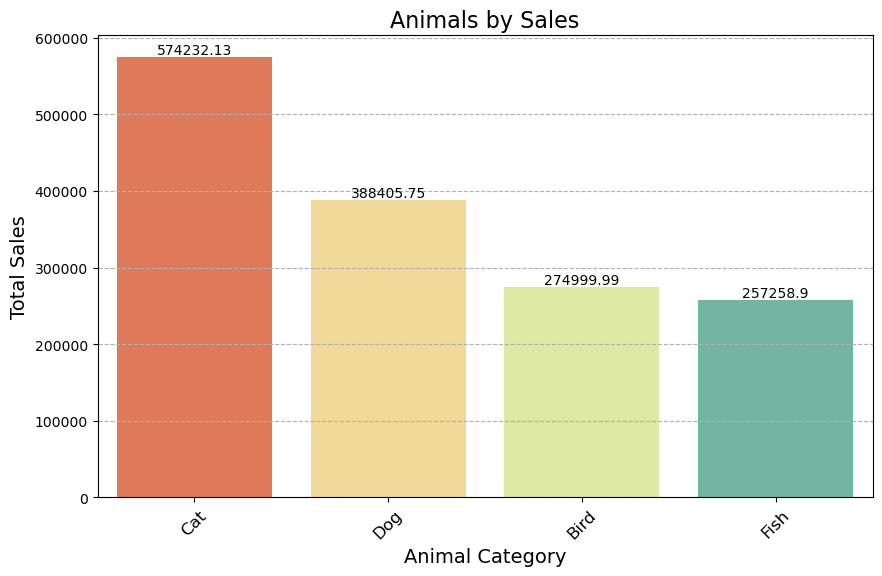

In [70]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=pet_sales.index, y=pet_sales.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Animals by Sales", fontsize=16)
plt.xlabel("Animal Category", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()


The Animal with the most sales is the Cat with a total amount of `$574,232.13` followed by Dog with a total amount of `$388,405.75` while the least is Fish with a total amount of `$257,258.9`.

In [72]:
# create a new column called 'Quantity' to see the most quantity of animals purchased

df_cleaned['Quantity'] = df_cleaned['Sales'] / df_cleaned['Price']
df_cleaned['Quantity'].head()

0    36.411350
1    26.781545
2    28.764009
3    39.364729
4    31.804049
Name: Quantity, dtype: float64

In [73]:
# convert the Quantity to Integer data type
df_cleaned['Quantity']  = df_cleaned['Quantity'].astype('int64')
df_cleaned['Quantity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: Quantity
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 11.8 KB


In [74]:
df_cleaned.head(2)

,Category,Animal,Size,Price,product_id,Sales,Rating,Repeat Purchase,Quantity
0,Food,Bird,Large,51.10,1,1860.62,7.0,Yes,36
1,Housing,Bird,Medium,35.98,2,963.60,6.0,No,26


In [75]:
# The maximum quantity purchased for each Animal?

pet_max_qty = df_cleaned.groupby('Animal')['Quantity'].max().sort_values(ascending = False)
pet_max_qty

Animal
Bird    66
Dog     63
Cat     61
Fish    46
Name: Quantity, dtype: int64

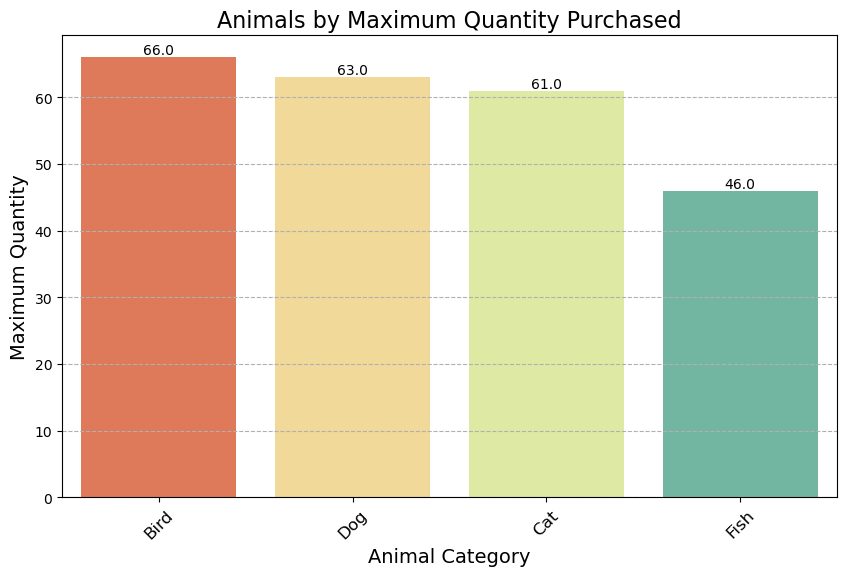

In [76]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=pet_max_qty.index, y=pet_max_qty.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Animals by Maximum Quantity Purchased", fontsize=16)
plt.xlabel("Animal Category", fontsize=14)
plt.ylabel("Maximum Quantity", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()

The pet with the most quantity purchased is the Bird with a total count of 66 followed by Dog with a maximum count of 63 while the least quantity purchase is Fish with a total count of 46.

In [78]:
# Which animal will likely have a repeat purchase?
df_cleaned.groupby('Animal')['Repeat Purchase'].value_counts().unstack()

Repeat Purchase,No,Yes
Animal,,
Bird,86,111
Cat,223,344
Dog,159,208
Fish,126,243


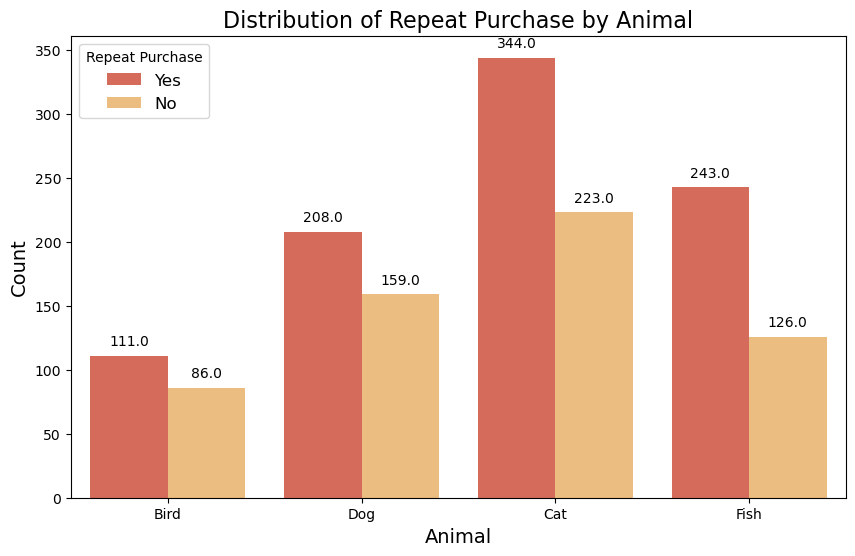

In [79]:
# Animal vs repeat purchase distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Animal", hue="Repeat Purchase", data=df_cleaned, palette=sns.color_palette("Spectral", 5), ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Customize the plot
ax.set_title("Distribution of Repeat Purchase by Animal", fontsize=16)
ax.set_xlabel("Animal", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Repeat Purchase", loc="upper left", fontsize=12)

plt.show()

Based on Repeat Purchases, the Cat is the most likely animal that customers will want to make a repeat purchase because of a total count of 344, followed by Fish with a count of 243 while the least animal is Bird with a count of 111.

In [81]:
# Animal with their average price?
animal_avg_price = df_cleaned.groupby('Animal')['Price'].mean().sort_values(ascending = True).round(2)
animal_avg_price

Animal
Fish    23.11
Cat     27.65
Dog     31.86
Bird    40.78
Name: Price, dtype: float64

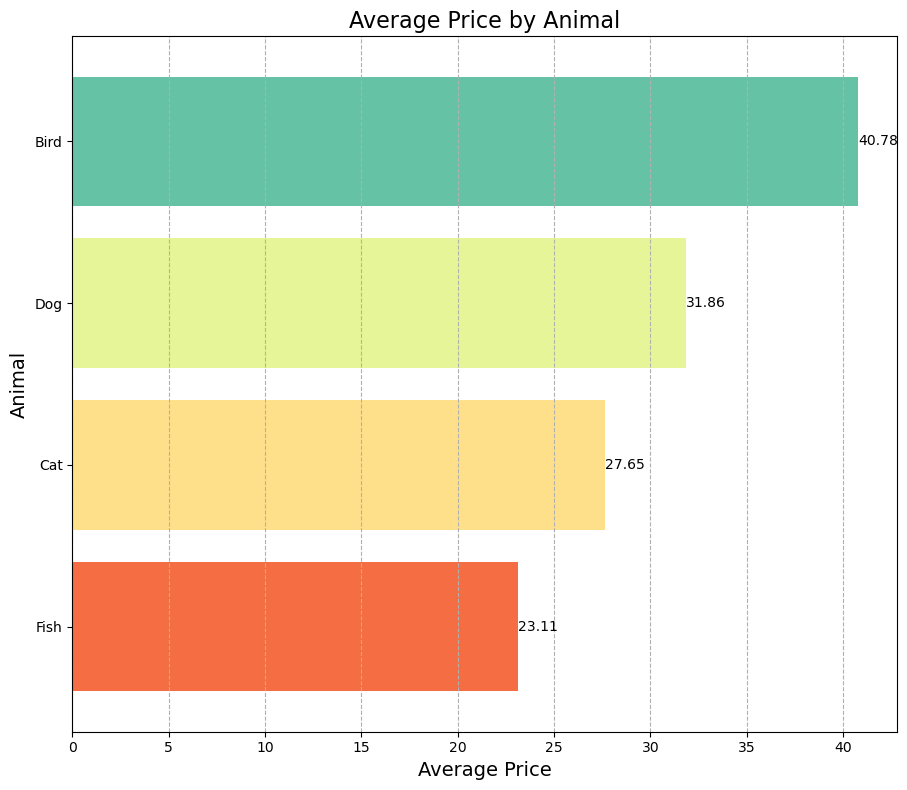

In [82]:
# Create the barh chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Spectral", n_colors=len(animal_avg_price))
animal_avg_price.plot(kind='barh', color=colors, width=0.8)

# Add data labels
for i, price in enumerate(animal_avg_price):
    plt.text(price, i, f"{price}", va='center', ha='left', fontsize=10)

# Customize the plot
plt.title("Average Price by Animal", fontsize=16)
plt.xlabel("Average Price", fontsize=14)
plt.ylabel("Animal", fontsize=14)
plt.tight_layout()

# Adjust the spacing between bars
plt.subplots_adjust(left=0.3)

# Add grid lines
plt.grid(axis="x", linestyle="--")

plt.show()


The Bird has the highest average purchase price with a value of `$40.78` followed by Dog with a value of `$31.86` while the least is Fish with a value of `$23.11`

In [152]:
# Average rating by Animals
avg_animal_rating = df_cleaned.groupby('Animal')['Rating'].mean().sort_values(ascending = False).round(1)
avg_animal_rating

Animal
Cat     5.0
Bird    4.3
Dog     4.2
Fish    4.1
Name: Rating, dtype: float64

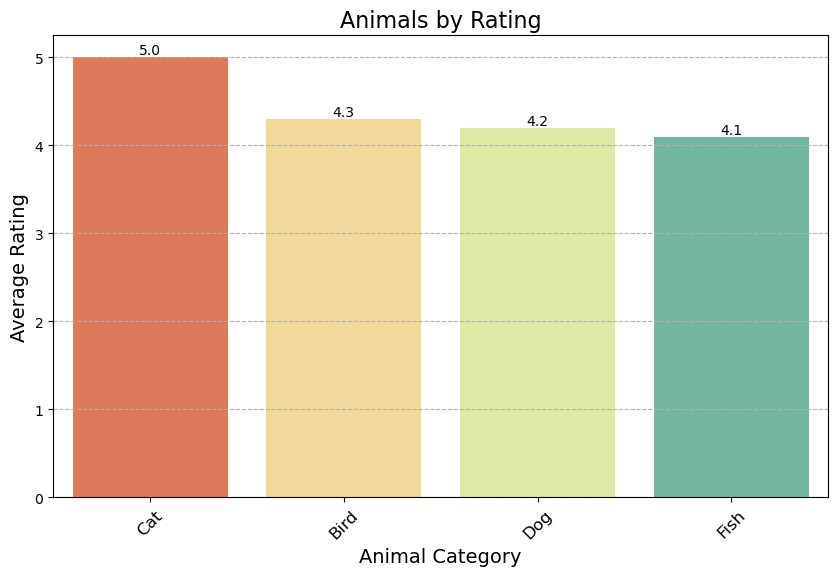

In [156]:
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_animal_rating.index, y=avg_animal_rating.values, palette="Spectral")

# Add data labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height()}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title("Animals by Rating", fontsize=16)
plt.xlabel("Animal Category", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
plt.grid(axis="y", linestyle="--")

# Show the plot
plt.show()

The Fish has the lowest rating of 4.1 while the Cat has the highest rating of 5.0 followed by the Bird with a rating of 4.3.

## Sales and Price Analysis
- Sales Vs Price
- Sales Vs Quantity
- Price Vs Quantity
- Sales and Repeat Purchase (Histogram)

In [184]:
# Correlation between Price and Sales
corr = df_cleaned['Sales'].corr(df_cleaned['Price'])
print(f'The correlation coefficient is {corr:.2f}')

The correlation coefficient is 0.88


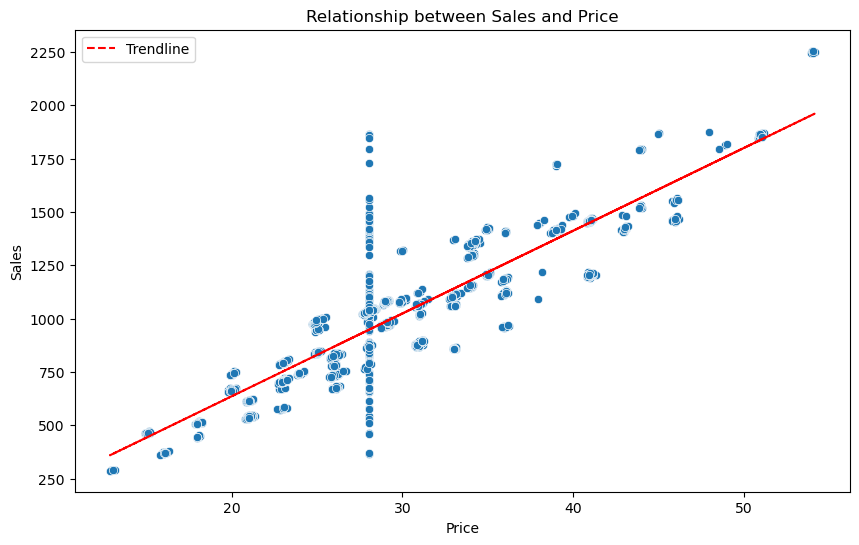

In [171]:
# The relationship between Sales and Price using scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Price'], y=df_cleaned['Sales'], data=df_cleaned, ax=ax)

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Sales')
ax.set_title('Relationship between Sales and Price')

# Add a trendline
z = np.polyfit(df_cleaned['Price'], df_cleaned['Sales'], 1)
p = np.poly1d(z)
ax.plot(df_cleaned['Price'], p(df_cleaned['Price']), color='r', linestyle='--', label='Trendline')
ax.legend()

# Save the plot
plt.savefig('sales_price_scatterplot.png')
plt.show()

The relationship between Sales and Price is strongly positive which implies that as Price increases, Sales also increase with a positive trendline and a correlation coefficient of 0.88.

In [186]:
# Correlation between Quantity and Sales
corr = df_cleaned['Sales'].corr(df_cleaned['Quantity'])
print(f'The correlation coefficient is {corr:.2f}')

The correlation coefficient is 0.67


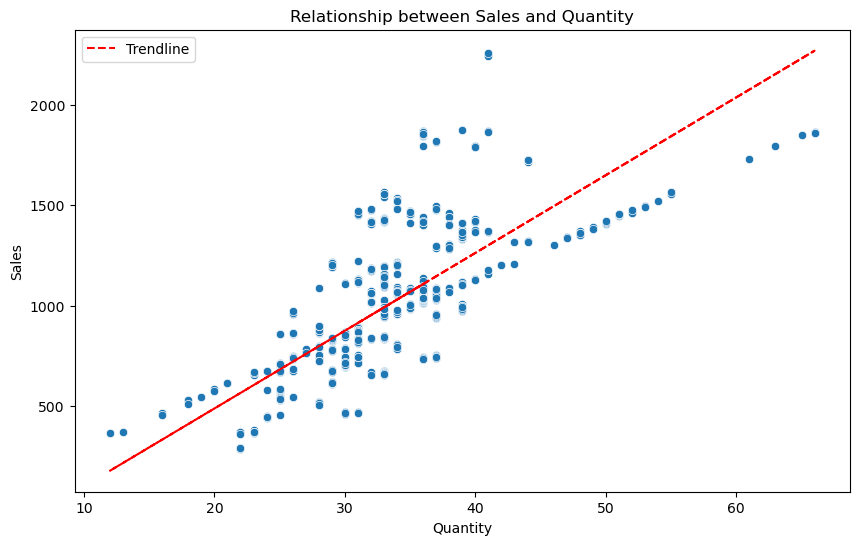

In [173]:
# The relationship between Sales and Quantity using scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Quantity'], y=df_cleaned['Sales'], data=df_cleaned, ax=ax)

# Add labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Sales')
ax.set_title('Relationship between Sales and Quantity')

# Add a trendline
z = np.polyfit(df_cleaned['Quantity'], df_cleaned['Sales'], 1)
p = np.poly1d(z)
ax.plot(df_cleaned['Quantity'], p(df_cleaned['Quantity']), color='r', linestyle='--', label='Trendline')
ax.legend()

# Show the plot
plt.show()

The relationship between Quantity and Sales is positive which implies that as Quantity increases, price also increases with a correlation coefficient of 0.67.

In [190]:
# Correlation between Quantity and Price
corr = df_cleaned['Price'].corr(df_cleaned['Quantity'])
print(f'The correlation coefficient is {corr:.2f}')

The correlation coefficient is 0.25


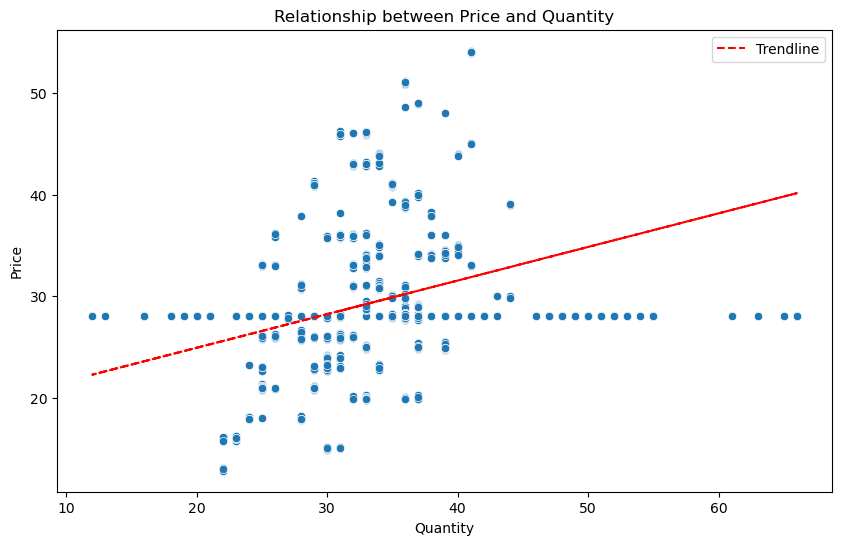

In [194]:
# The relationship between Price and Quantity using scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Quantity'], y=df_cleaned['Price'], data=df_cleaned, ax=ax)

# Add labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_title('Relationship between Price and Quantity')

# Add a trendline
z = np.polyfit(df_cleaned['Quantity'], df_cleaned['Price'], 1)
p = np.poly1d(z)
ax.plot(df_cleaned['Quantity'], p(df_cleaned['Quantity']), color='r', linestyle='--', label='Trendline')
ax.legend()

# Show the plot
plt.show()

There is a slight positive correlation between price and quantity with a correlation coefficient of 0.25 which implies that a gradual increase in quantity will lead to a gradual increase in price and vice versa.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


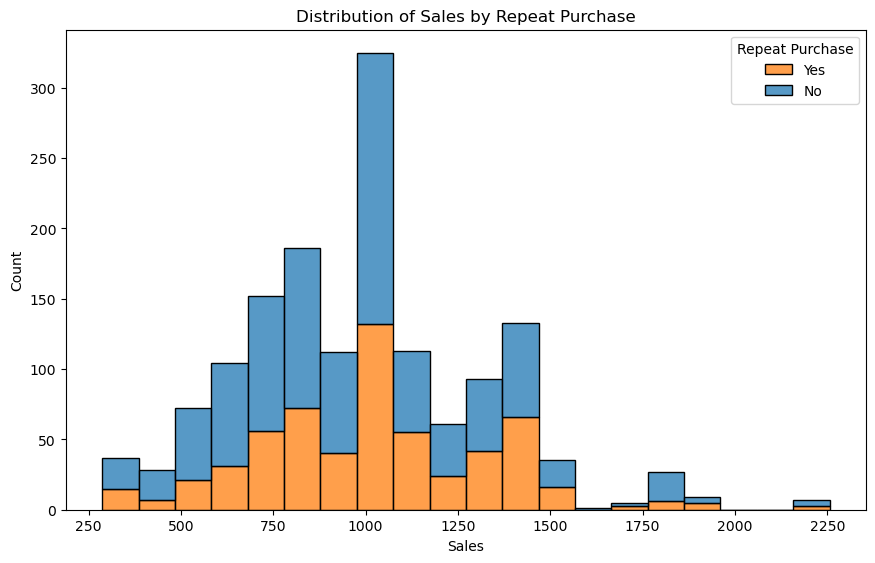

In [197]:
# Create the histogram distribution of Sales and Repeat Purchases
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='Sales', data=df_cleaned, hue='Repeat Purchase', multiple='stack', bins=20, ax=ax)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sales by Repeat Purchase')

# Customize the legend
legend_labels = df_cleaned['Repeat Purchase'].unique()
ax.legend(title='Repeat Purchase', labels=legend_labels)

# Adjust the spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the plot
plt.savefig('sales_repeat_purchase_histogram.png')
plt.show()

The graph shows that customers who made repeat purchases were a major driver of sales. As the number of repeat purchases increased, sales rose steadily. In contrast, customers who did not make repeat purchases had a much smaller impact on overall sales. 


This suggests that retaining and encouraging repeat business from customers is crucial for driving sales growth for this business. The data visualized in the graph highlights the importance of customer loyalty and repeat purchases in contributing to the company's revenue.

## Hypothesis Test
H0 (Null Hypothesis): Higher sales of a product will lead to a higher rate of repeat purchases by customers.

H1 (Alternate Hypothesis):
Higher sales of a product will not lead to a higher rate of repeat purchases by customers.

The key points about the F-oneway ANOVA Test are:

1. One-way ANOVA:
   - This type of ANOVA is used when you have one independent variable (also called a factor) with two or classesevels or groups.
   - The goal is to determine if the means of the dependent variable differ significantly across the levels of the independent variable.

2. F-statistic:
   - The F-statistic is the test statistic used in the ANOVA test.
   - It compares the variance beclassesthe groups (due to the independent variable) to the variance wclassesthe groups (due to random error or chance).
   - A larger F-statistic indicates that the differences bclassesn the group means are larger than the differences classes the groups, suggesting that the independent variable has a significant effect on the dependent variable.

3. p-value:
   - The p-value is the probability of obtaining the observed F-statistic (or a more extreme value) under the null hypothesis, which assumes that there is no significant differencclassesween the group means.
   - **If the p-value is less than the chosen significance level (e.g., 0.05 or 5%), the null hypothesis is rejected, indicating that there is a statistically significant difference between at least two of the group means.**

The F-oneway ANOVA test is a powerful tool for analyzing the relationship between a categorical independent variable (with t or classeswo or more levels) and a continuous dependent variable. It allows researchers to determine if the means of the dependent variable differ significantly across the levels of the inde-oneway ANOVA test.

In [211]:
from scipy.stats import f_oneway

# Assuming your data is in a DataFrame called 'df'
num_vars = ['Sales', 'Price']  # Replace with your actual numeric column names

for col in num_vars:
    yes_group = df_cleaned[df_cleaned['Repeat Purchase'] == 'Yes'][col]
    no_group = df_cleaned[df_cleaned['Repeat Purchase'] == 'No'][col]
    anova_result = f_oneway(yes_group, no_group)
    print(f"ANOVA for {col} and Repeat Purchase:")
    print(f"F-statistic: {anova_result.statistic:.2f}")
    print(f"p-value: {anova_result.pvalue:.4f}")
    print()


ANOVA for Sales and Repeat Purchase:
F-statistic: 9.51
p-value: 0.0021

ANOVA for Price and Repeat Purchase:
F-statistic: 12.26
p-value: 0.0005



Understood. Based on the provided ANOVA results:

- The F-statistic of 9.51 indicates a significant difference between the 'Yes' and 'No' groups of the 'Repeat Purchase' variable.
- The p-value of 0.0021 is less than the commonly used significance level of 0.05.

Given these findings, we can conclude the following:

Since the p-value (0.0021) is less than the significance level of 0.05, we have sufficient statistical evidence to **reject the null hypothesis (H0)** and **accept the alternate hypothesis (H1)**.

The alternate hypothesis (H1) states that higher sales of a product will not lead to a higher rate of repeat purchases by customers. In other words, the data suggests that there is no significant positive relationship between higher sales and a higher rate of repeat purchases.

This means that the analysis does not support the initial hypothesis (H0) that higher sales lead to higher repeat purchases. There are likely other factors, such as customer satisfaction, competition, or product lifecycle, that play a more important role in influencing the rate of repeat purchases, independent of the sales volume.

These findings provide valuable insights that can inform marketing strategies, product development, and customer retention efforts to better understand and address the drivers of repeat purchase behavior.t purchases.

In [231]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         1500 non-null   object 
 1   Animal           1500 non-null   object 
 2   Size             1500 non-null   object 
 3   Price            1500 non-null   float64
 4   product_id       1500 non-null   int64  
 5   Sales            1500 non-null   float64
 6   Rating           1500 non-null   float64
 7   Repeat Purchase  1500 non-null   object 
 8   Quantity         1500 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 105.6+ KB


## Multivariate Analysis
- comparing more than two variables with the target, which is `Repeat Purchase`, and their visualizations.

In [285]:
# Product Category and Repeat Purchase by Total Sales
cat_repeat_purchase = df_cleaned.groupby(['Category', 'Repeat Purchase'])['Sales'].sum().sort_values(ascending=False).unstack()
cat_repeat_purchase

Repeat Purchase,No,Yes
Category,,
Accessory,57873.72,63399.72
Equipment,143461.97,205413.27
Food,120317.11,166821.05
Housing,57299.10,118031.21
Medicine,79429.19,134637.06
Toys,139865.35,180031.75
Unknown,12604.16,15712.11


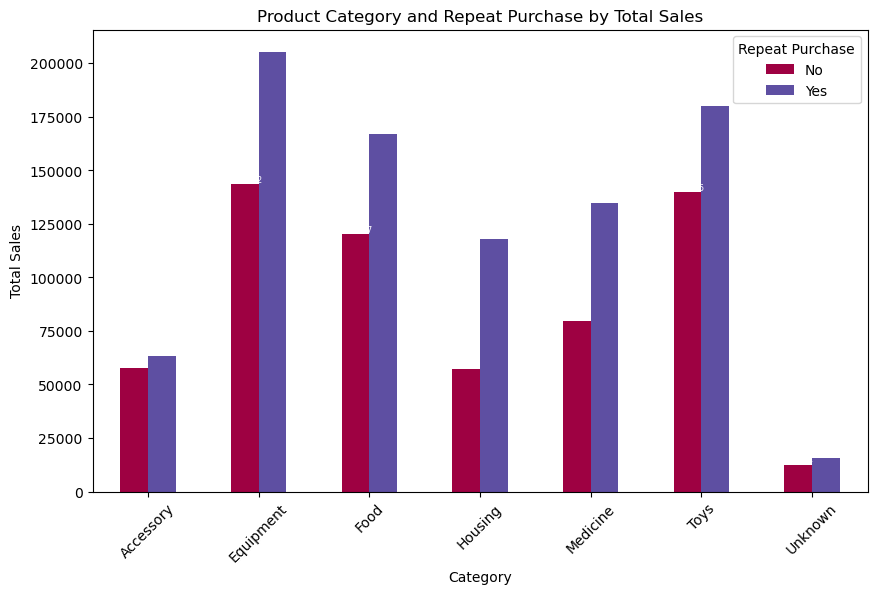

In [257]:
# plot a pivot table
ax = cat_repeat_purchase.plot.bar(figsize=(10, 6), cmap='Spectral')
plt.ticklabel_format(style='plain', axis='y')

# Set the title and labels
plt.title('Product Category and Repeat Purchase by Total Sales', fontsize=12)
plt.ylabel('Total Sales')

# Add data labels to the bars
for i, bar in enumerate(ax.containers):
    values = ['{:,.0f}'.format(v) for v in bar.datavalues]
    ax.bar_label(bar, label_type='edge', labels=values, fontsize=6, color='white')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()


In [265]:
# Category and Repeat Purchase by Average Price
cat_repeat_purchase_avg_price = df_cleaned.groupby(['Category', 'Repeat Purchase'])['Price'].mean().sort_values(ascending=False).unstack().round(1)
cat_repeat_purchase_avg_price

Repeat Purchase,No,Yes
Category,,
Accessory,33.1,29.9
Equipment,27.4,26.6
Food,34.1,33.4
Housing,26.4,26.6
Medicine,25.9,24.6
Toys,33.6,33.0
Unknown,33.4,31.3


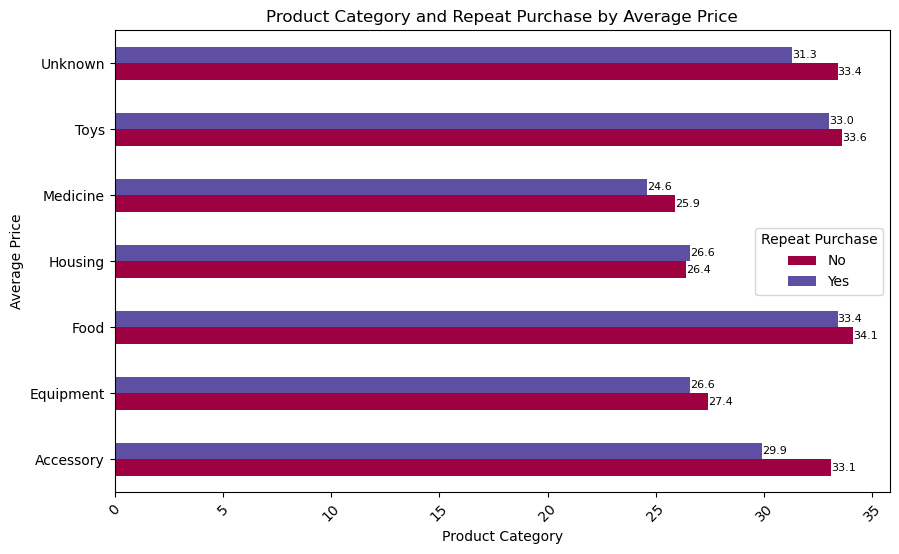

In [275]:
# plot a pivot table
ax = cat_repeat_purchase_avg_price.plot.barh(figsize = (10, 6),  cmap= 'Spectral')
plt.ticklabel_format(style ='plain', axis = 'x')
# Set the title and labels
plt.title('Product Category and Repeat Purchase by Average Price', fontsize = 12)
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.1f}'.format(v) for v in i.datavalues], fontsize=8)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

In [277]:
# Category and Repeat Purchase by Maximum Quantity
cat_repeat_purchase_max_qty = df_cleaned.groupby(['Category', 'Repeat Purchase'])['Quantity'].max().sort_values(ascending=False).unstack().round(1)
cat_repeat_purchase_max_qty 

Repeat Purchase,No,Yes
Category,,
Accessory,37,50
Equipment,51,48
Food,66,66
Housing,55,55
Medicine,53,53
Toys,63,54
Unknown,39,52


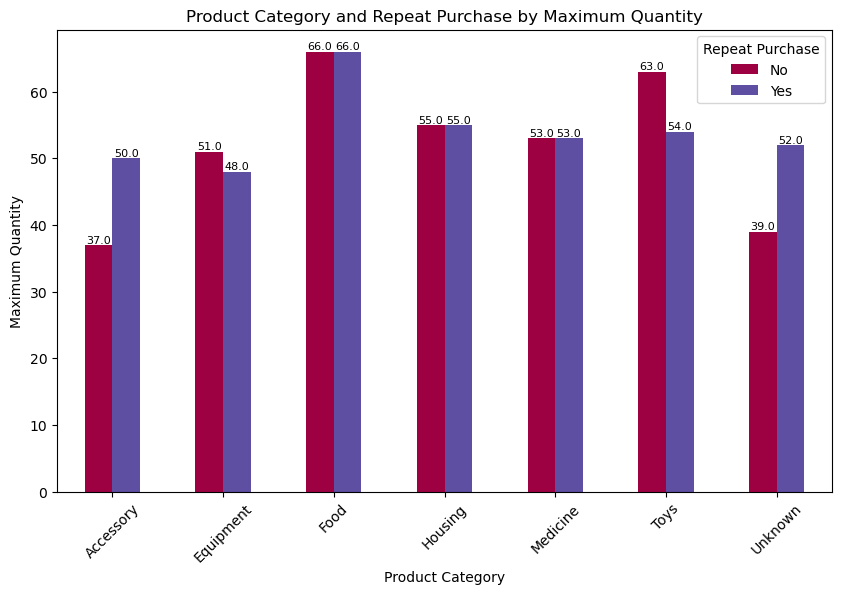

In [279]:
# plot a pivot table
ax = cat_repeat_purchase_max_qty.plot.bar(figsize=(10, 6), cmap='Spectral')
plt.ticklabel_format(style='plain', axis='y')

# Set the title and labels
plt.title('Product Category and Repeat Purchase by Maximum Quantity', fontsize=12)
plt.xlabel('Product Category')
plt.ylabel('Maximum Quantity')

# Add data labels to the bars
for i, bar in enumerate(ax.containers):
    values = ['{:,.1f}'.format(v) for v in bar.datavalues]
    ax.bar_label(bar, label_type='edge', labels=values, fontsize=8)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()


In [281]:
# Category and Repeat Purchase by Average Rating
cat_repeat_purchase_avg_rating = df_cleaned.groupby(['Category', 'Repeat Purchase'])['Rating'].mean().sort_values(ascending=False).unstack().round(1)
cat_repeat_purchase_avg_rating

Repeat Purchase,No,Yes
Category,,
Accessory,4.2,3.7
Equipment,4.6,4.5
Food,4.3,4.3
Housing,3.9,3.8
Medicine,4.9,4.7
Toys,5.2,5.2
Unknown,4.3,4.6


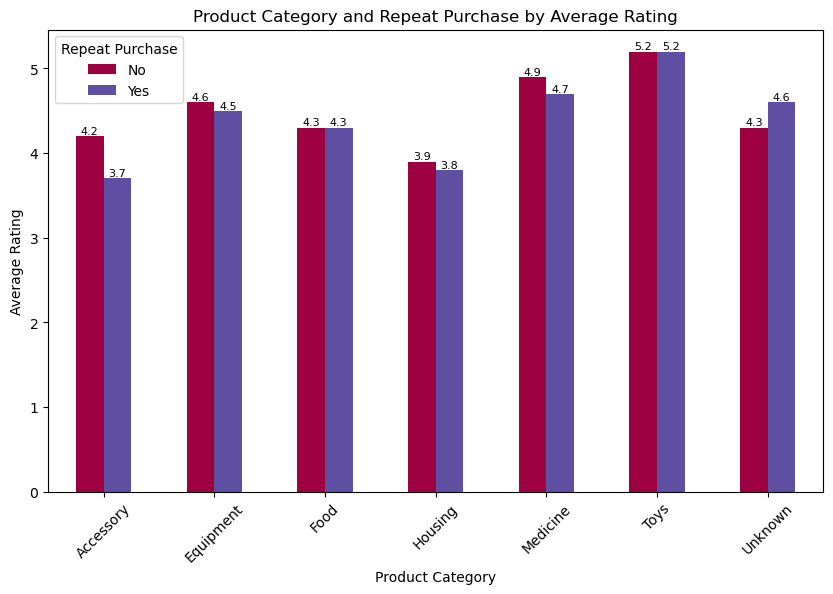

In [283]:
# plot a pivot table
ax = cat_repeat_purchase_avg_rating.plot.bar(figsize=(10, 6), cmap='Spectral')
plt.ticklabel_format(style='plain', axis='y')

# Set the title and labels
plt.title('Product Category and Repeat Purchase by Average Rating', fontsize=12)
plt.xlabel('Product Category')
plt.ylabel('Average Rating')

# Add data labels to the bars
for i, bar in enumerate(ax.containers):
    values = ['{:,.1f}'.format(v) for v in bar.datavalues]
    ax.bar_label(bar, label_type='edge', labels=values, fontsize=8)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()


In [307]:
num_cols = df_cleaned.select_dtypes(include = ['int64', 'float64'])
num_cols

,Price,product_id,Sales,Rating,Quantity
0,51.10,1,1860.62,7.0,36
1,35.98,2,963.60,6.0,26
2,31.23,3,898.30,5.0,28
3,24.95,4,982.15,6.0,39
4,26.18,5,832.63,7.0,31
...,...,...,...,...,...
1495,40.91,1496,1203.36,5.0,29
1496,32.89,1497,1099.97,5.0,33
1497,25.79,1498,724.02,3.0,28
1498,19.94,1499,658.66,5.0,33


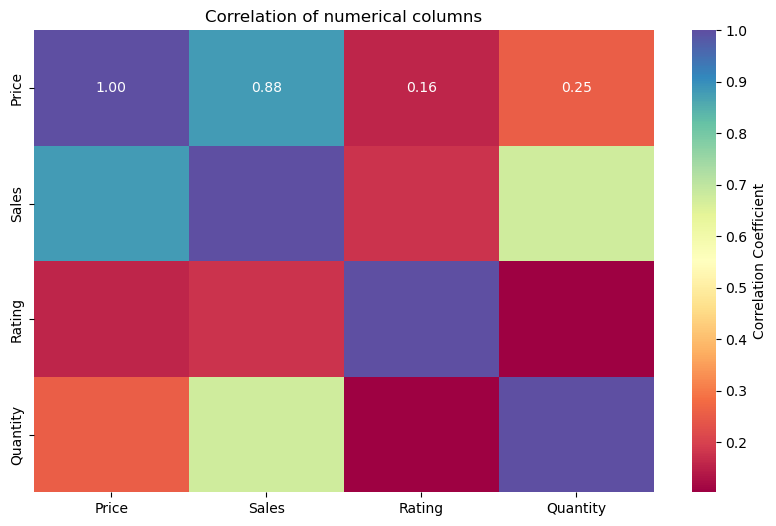

In [319]:
# The relationship between numerical columns
select_cols = num_cols[['Price', 'Sales', 'Rating', 'Quantity']]
corr = select_cols.corr()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation of numerical columns')

# Add colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Coefficient')

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

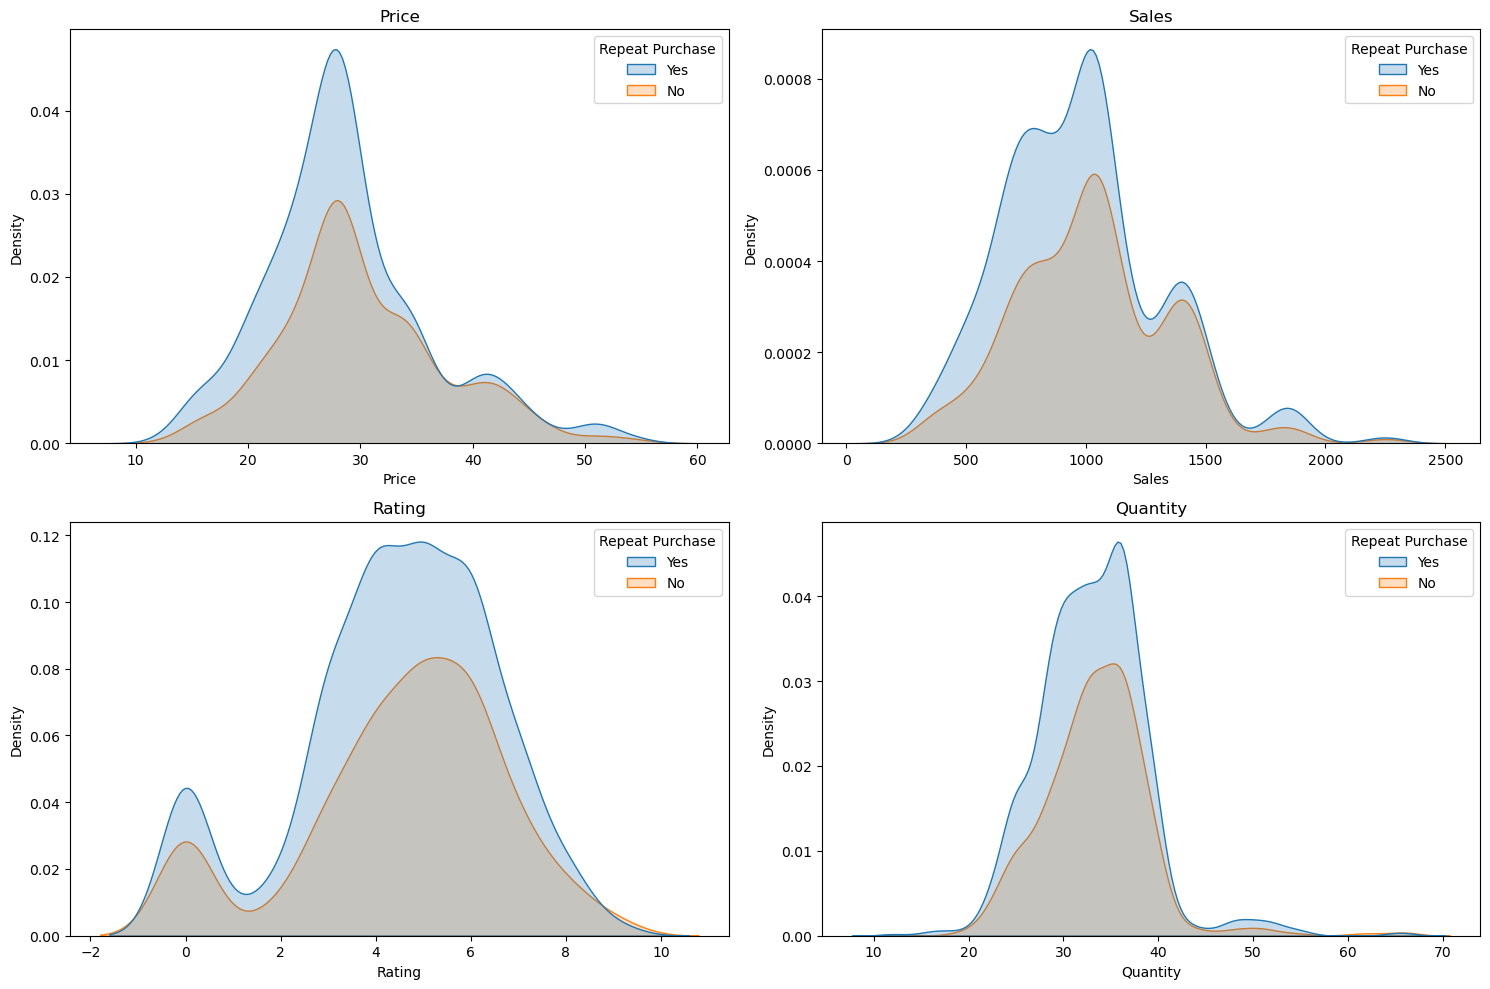

In [327]:
# checking the distribution of Independent Variables
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

# Flatten the axes array to simplify indexing
ax = ax.flatten()

# Iterate over each column and corresponding axes
for i, (col, axes) in enumerate(zip(select_cols, ax)):
    # Plot the KDE plot for the current column using seaborn with the 'hue' parameter
    sns.kdeplot(data=df_cleaned, x=col, hue='Repeat Purchase', ax=axes, fill=True)
    axes.set_title(col)  # setting the column name as given

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

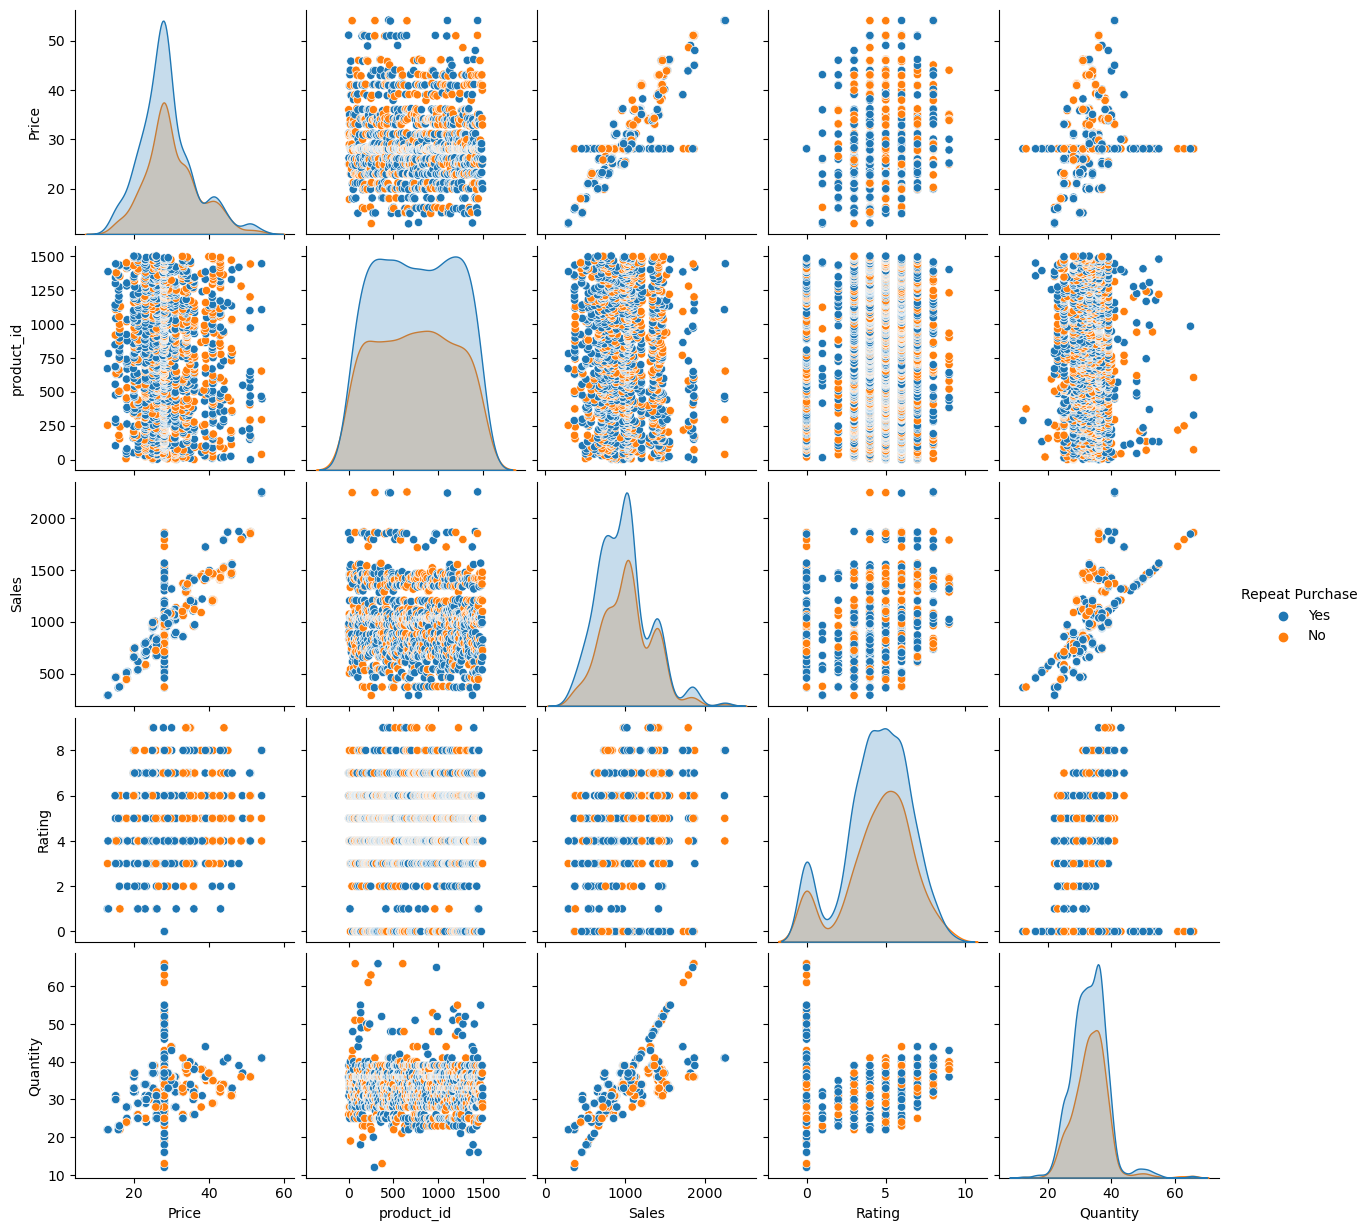

In [334]:
# pairplots of the data
sns.pairplot(df_cleaned, hue='Repeat Purchase', diag_kind='kde')
plt.show()

## Key Findings

## Business Recommendations